Antes que nada, para el corrector o lector quería decirle:

- Lo he hecho en pandas pues aprender PySpark en dos días era muy arriesgado para completar la tarea. Pero yo no rechazo a PySpark, podría aprenderlo perfectamente.

- Dígame si desea ver un código mio de clasificador de sonidos y un pdf sobre las prácticas que realicé en una empresa sobre ciencia de datos. Si lo desea, se lo paso al personal de RRHH que está hablando conmigo. Si no quiere le respeto, no le quiero hacer perder su tiempo.

- He intentado hacer control de versiones con GitHub pero no se ha hecho correctamente.



In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# Carga los datos del fichero housing_train.csv que guardado en la carpeta sample_data en un data frame de Spark.

In [2]:
Data_housing_train = pd.read_csv("/kaggle/input/dataset-principal/california_housing_train.csv")

# Crea otro data frame a apartir de un muestreo aleatorio del 20% del data frame creado. Después crea otro data frames con el resto de registros. Comprueba que al unir los dos data frames creados no existen pérdidas ni duplicados de registors respecto al obtenido en el paso anterior.

Genero la muestra del 20%

In [3]:
Sample_Data_housing_train = Data_housing_train.sample(frac=0.2)

Aquí el data frame

In [4]:
Sample_Data_housing_train 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
522,-117.00,32.87,18.0,11544.0,1979.0,6296.0,1923.0,4.4904,150400.0
16416,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,345700.0
12222,-121.47,38.57,52.0,438.0,103.0,176.0,99.0,3.0217,200000.0
13174,-121.89,37.28,32.0,4308.0,717.0,2002.0,695.0,4.1645,281900.0
8861,-118.75,34.27,26.0,966.0,191.0,690.0,191.0,5.1698,188000.0
...,...,...,...,...,...,...,...,...,...
15777,-122.41,37.79,52.0,2302.0,938.0,1515.0,861.0,1.3668,55000.0
3397,-117.88,33.69,20.0,5330.0,976.0,2734.0,1000.0,5.2138,233100.0
8146,-118.43,34.06,38.0,2982.0,664.0,1122.0,572.0,4.1908,500001.0
10953,-120.88,37.37,24.0,1294.0,222.0,684.0,221.0,2.6908,103100.0


Creo el resto que es una muestra del 80%

In [5]:
df = Data_housing_train

Sample_df = Sample_Data_housing_train

#Para generar el resto. Cojo el "todo" y le sumo la muestra.
#Todo+ muestra = muestra + resto de muestra + muestra.
# Utilizo el comando drop con keep=False para eliminar todos los datos repetidos
#Solo queda resto de muestra


Rest_Sample_Data_housing_train=pd.concat([df,Sample_df]).drop_duplicates(keep=False)

Ahora miro si sumando los dos data frame da el data frame original

In [6]:
Rest_df =Rest_Sample_Data_housing_train


Data_sumada_por_2_partes=pd.concat([Rest_df,Sample_df])

In [7]:
#concat desordena los datos y entonces debo ordenar para que el comando equals funcione


Data_ordenada_sumada_por_2_partes = Data_sumada_por_2_partes.sort_index()

In [8]:
Data_ordenada_sumada_por_2_partes.equals(Data_housing_train)

True

Este comando nos dice que es el mismo data frame

**Laboratorio 1**

Como físico sé que una ley física nace de la inducción de una muestra de casos particulares. Entonces llamo a Laboratorio en este codigo a experimentar con datos pequeños y ver cual es la esencia cuando se programa en datos grandes. Induzco el codigo para datos grandes de casos particulares. He borrado algunos laboratorios por el camino

No hace falta que lo mire, no hay información útil. Salteselos si desea

In [9]:
df_ = pd.DataFrame(np.random.randint(0,100,size=(10, 7)), columns=list('ABCDEFG'))

In [10]:
df_

,A,B,C,D,E,F,G
0,34,48,92,97,58,91,43
1,64,67,61,67,38,50,49
2,40,5,80,5,42,18,64
3,95,1,21,11,68,61,24
4,14,29,72,68,35,53,24
5,0,37,40,15,23,29,51
6,26,92,58,26,96,57,91
7,25,82,33,36,80,33,83
8,21,87,19,10,31,60,68
9,59,34,69,7,44,86,81


In [11]:
Sample_df_ = df.sample(frac=0.2)

Rest_Sample_df_=pd.concat([df_,Sample_df_]).drop_duplicates(keep=False)

x=pd.concat([Rest_Sample_df_,Sample_df_])

In [12]:
x =x.sort_index()

x.equals(df_)

False

In [13]:
df_

,A,B,C,D,E,F,G
0,34,48,92,97,58,91,43
1,64,67,61,67,38,50,49
2,40,5,80,5,42,18,64
3,95,1,21,11,68,61,24
4,14,29,72,68,35,53,24
5,0,37,40,15,23,29,51
6,26,92,58,26,96,57,91
7,25,82,33,36,80,33,83
8,21,87,19,10,31,60,68
9,59,34,69,7,44,86,81


In [14]:
x

,A,B,C,D,E,F,G,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34.0,48.0,92.0,97.0,58.0,91.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64.0,67.0,61.0,67.0,38.0,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.0,5.0,80.0,5.0,42.0,18.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124.17,40.75,13.0,2171.0,339.0,951.0,353.0,4.8516,116100.0
16978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124.18,40.79,39.0,1836.0,352.0,883.0,337.0,1.7450,70500.0
16978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124.18,40.79,39.0,1836.0,352.0,883.0,337.0,1.7450,70500.0
16981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124.18,40.78,33.0,1076.0,222.0,656.0,236.0,2.5096,72200.0


In [15]:
Sample_df_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8779,-118.61,34.16,29.0,4364.0,647.0,1550.0,624.0,6.8107,367400.0
13720,-122.00,37.58,6.0,4405.0,717.0,2071.0,688.0,5.8151,295600.0
8203,-118.44,34.22,36.0,1191.0,266.0,718.0,248.0,3.4612,178800.0
13076,-121.87,37.30,28.0,859.0,199.0,455.0,211.0,2.3293,215900.0
15689,-122.39,40.59,26.0,1279.0,438.0,1276.0,420.0,1.2404,81300.0
...,...,...,...,...,...,...,...,...,...
7181,-118.33,34.15,44.0,1321.0,303.0,471.0,301.0,4.2679,331800.0
11665,-121.30,38.74,41.0,4374.0,1039.0,2387.0,959.0,2.3611,87900.0
9752,-119.65,36.35,21.0,1745.0,266.0,837.0,292.0,4.3911,107900.0
6423,-118.26,33.82,28.0,5091.0,1074.0,4753.0,1033.0,3.6477,117400.0


**Fin Laboratorio 1**

# Realiza un histograma de cada uno de los campos y compara los dos data frames creados en el paso anterior.

En este caso he dividido los plots de 3 en 3 para los tres data frame

Para el data frame original

array([<AxesSubplot:title={'center':'longitude'}>,
       <AxesSubplot:title={'center':'latitude'}>,
       <AxesSubplot:title={'center':'housing_median_age'}>], dtype=object)

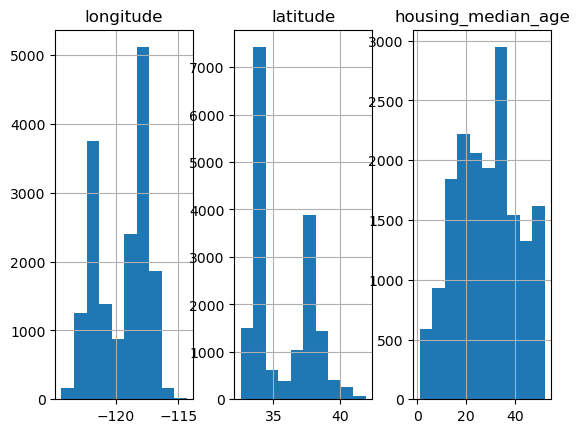

In [16]:

fig, axis = plt.subplots(1, 3)


Data_housing_train.iloc[:, 0:3].hist(ax=axis)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>, <AxesSubplot:>]],
      dtype=object)

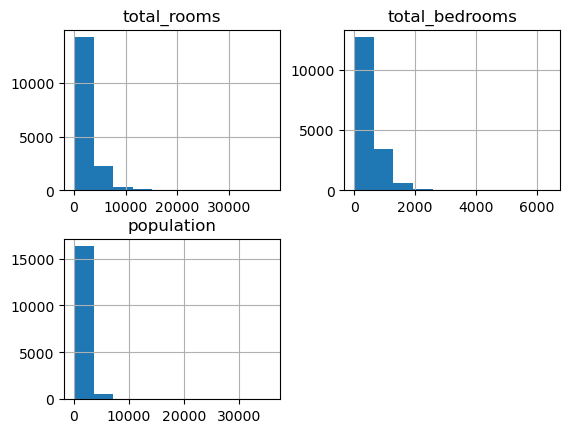

In [17]:
fig, axis = plt.subplots(1, 1)


Data_housing_train.iloc[:, 3:6].hist(ax=axis)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>]], dtype=object)

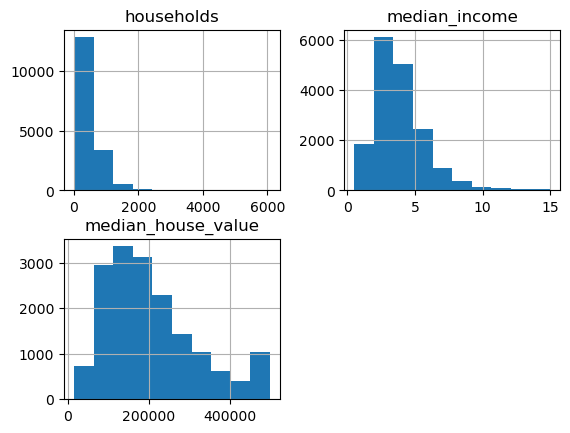

In [18]:
fig, axis = plt.subplots(1, 1)


Data_housing_train.iloc[:, 6:9].hist(ax=axis)

Para el data frame de muestra del 20%

array([<AxesSubplot:title={'center':'longitude'}>,
       <AxesSubplot:title={'center':'latitude'}>,
       <AxesSubplot:title={'center':'housing_median_age'}>], dtype=object)

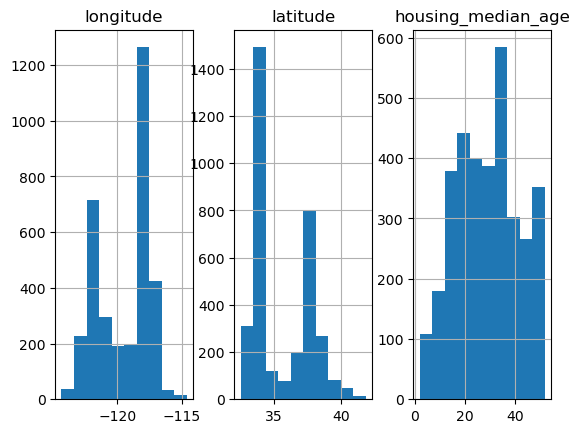

In [19]:
fig, axis = plt.subplots(1, 3)


Sample_Data_housing_train.iloc[:, 0:3].hist(ax=axis)

array([<AxesSubplot:title={'center':'total_rooms'}>,
       <AxesSubplot:title={'center':'total_bedrooms'}>,
       <AxesSubplot:title={'center':'population'}>], dtype=object)

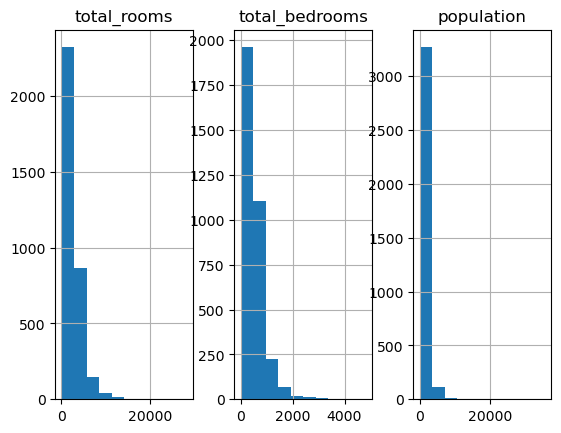

In [20]:
fig, axis = plt.subplots(1, 3)


Sample_Data_housing_train.iloc[:, 3:6].hist(ax=axis)

array([<AxesSubplot:title={'center':'households'}>,
       <AxesSubplot:title={'center':'median_income'}>,
       <AxesSubplot:title={'center':'median_house_value'}>], dtype=object)

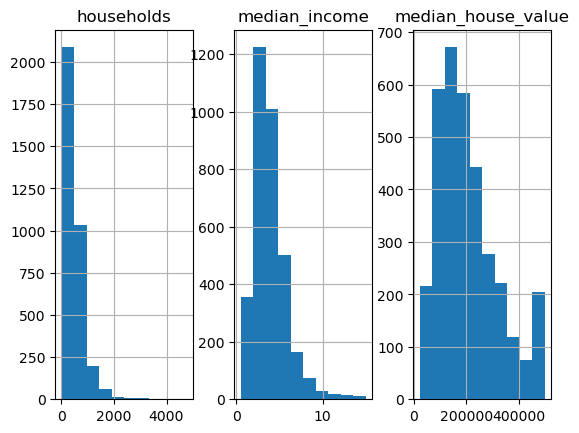

In [21]:
fig, axis = plt.subplots(1, 3)


Sample_Data_housing_train.iloc[:, 6:9].hist(ax=axis)

Para el data frame del resto del 80% del muestreo

array([<AxesSubplot:title={'center':'longitude'}>,
       <AxesSubplot:title={'center':'latitude'}>,
       <AxesSubplot:title={'center':'housing_median_age'}>], dtype=object)

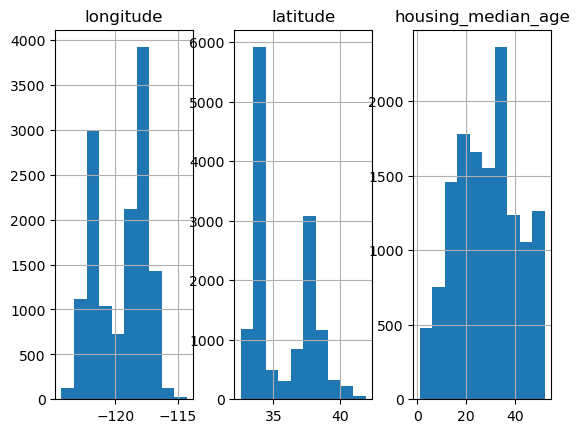

In [22]:
fig, axis = plt.subplots(1, 3)


Rest_Sample_Data_housing_train.iloc[:, 0:3].hist(ax=axis)

array([<AxesSubplot:title={'center':'total_rooms'}>,
       <AxesSubplot:title={'center':'total_bedrooms'}>,
       <AxesSubplot:title={'center':'population'}>], dtype=object)

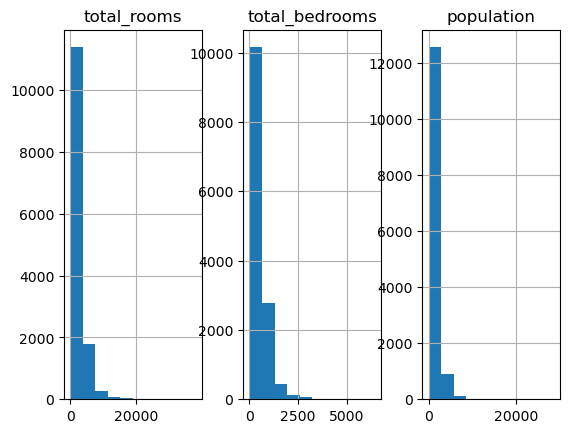

In [23]:
fig, axis = plt.subplots(1, 3)


Rest_Sample_Data_housing_train.iloc[:, 3:6].hist(ax=axis)

array([<AxesSubplot:title={'center':'households'}>,
       <AxesSubplot:title={'center':'median_income'}>,
       <AxesSubplot:title={'center':'median_house_value'}>], dtype=object)

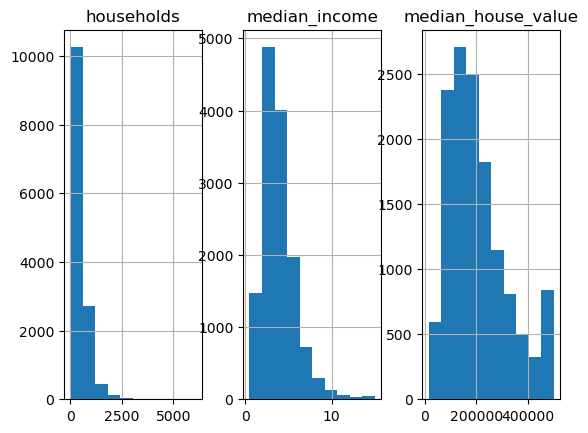

In [24]:
fig, axis = plt.subplots(1, 3)


Rest_Sample_Data_housing_train.iloc[:, 6:9].hist(ax=axis)

# Partiendo del data frame del primer paso. Obtén el registro que más al norte esté según el número de habitaciones que tenga. Es decir, el registro más al norte entre todos los registros con una sola habitación, el más al norte entre todos los registros de dos habitaciones, y así sucesivamente.

He creado una función para hacer eso

In [25]:
def paso_4 (df_entrada):

    df_contenedor = pd.DataFrame({'total_rooms': np.arange(17000) , 'latitude': np.arange(17000)})
    
    df_contenedor = df_contenedor.astype({'total_rooms':'int','latitude':'float64'})
    
    # primero creo un contenedor para ir metiendo el resultado
    
    # pongo en latitude float64 porque np.arenge da un dato int y perderia precision
    
    for i,rooms in enumerate(df_entrada.total_rooms) :
    
    # for para meter por cada numero de habitacion su maxima latitud
    
            df_contenedor.total_rooms[i] = rooms #numero de habitacion
        
            df_contenedor.latitude[i] = df_entrada.loc[df_entrada.total_rooms == rooms].latitude.max()
                                                   # dimer los datos que tenga tantas rooms y me miras el maximo de latitud
    
    return df_contenedor.sort_values(by = ["total_rooms"]).drop_duplicates(subset=['total_rooms'])

#Le doy un orden para visualizar mejor los datos.

#Tambien existen duplicaciones pues rooms recorrera varias veces un mismo numero porque recorre total_rooms
# no pongo Keep=false porque quiero coger de 2,2,2,2,2,2 solo un 2 y no quedarme sin la representcion para 2 habitciones

In [26]:
 paso_4(Data_housing_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,total_rooms,latitude
2990,2,35.21
16309,8,37.79
8188,11,34.28
15369,12,37.81
15656,15,37.60
...,...,...
1116,30401,33.52
8881,30405,34.16
2969,32054,34.03
12772,32627,36.64


# Partiendo de los dos data frames del Paso 2. Calcula la media de las latitudes de los cada data frame agregado por el el número de dormitorios. Calcula las difrencias entre las medias de cada data frame para el mismo número de dormitorios. Es decir, la diferencia entre la latitud media de los registros del data frame del 20% con un solo dormitorio y la latitud media del data frame del 80% con un solo dormitorio; Realiza esta operación para todo número de habitaciones.

Primero creo una función para calcular las medias

In [27]:

def calculo_medias_latitud_por_dormitorio (df_entrada):

    df_contenedor = pd.DataFrame({'total_bedrooms': np.arange(len(df_entrada)) , 'mean_latitude': np.arange(len(df_entrada))})
    
    df_contenedor = df_contenedor.astype({'total_bedrooms':'int','mean_latitude':'float64'})
    
    for i,bedrooms in enumerate(df_entrada.total_bedrooms) :
    
            df_contenedor.total_bedrooms[i] = bedrooms 
        
            df_contenedor.mean_latitude[i] = df_entrada.loc[df_entrada.total_bedrooms == bedrooms].latitude.mean()
    
                   #Es la misma idea que antes pero en vez de valor maximo se calcula una media
    return df_contenedor.sort_values(by = ["total_bedrooms"]).drop_duplicates(subset=['total_bedrooms'])

In [28]:
Sample_df= calculo_medias_latitud_por_dormitorio(Sample_Data_housing_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [29]:
Sample_df

,total_bedrooms,mean_latitude
655,2,35.210
2337,3,34.695
536,4,38.510
495,5,32.750
2745,6,34.060
...,...,...
1079,3358,38.540
2062,3753,33.190
298,3864,37.530
2964,4095,34.100


In [30]:
Rest_Sample_df = calculo_medias_latitud_por_dormitorio(Rest_Sample_Data_housing_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [31]:
Rest_Sample_df

,total_bedrooms,mean_latitude
13041,1,37.790
12530,3,35.925
11002,4,37.490
2608,5,34.900
6558,6,36.010
...,...,...
1667,4952,33.980
888,4957,33.520
2357,5290,34.030
2284,5471,33.890


Ahora creo una función para calcular las diferencias

In [32]:
#La esencia de esta función es paso data frame a arrays, resto arrays y luego paso dataframe 


def diferencia_medias(df1,df2):
    
    lista= list(set(df1.total_bedrooms) & set(df2.total_bedrooms))
    
    #para restar si tengo bolas rojas,verdes, azules y mi amigo tiene azules y rojas
    # no tiene sentido preguntar la diferencia de media de dureza entre las pelotas verdes
    # pues yo tengo una media pero mi amigo tiene 0 pelotas verdes y /0 no se puede.
    #Entonces hay que buscar los datos en comun
    
    df1_comun = df1.loc[df1.total_bedrooms.isin(lista)]

    df2_comun = df2.loc[df2.total_bedrooms.isin(lista)]
    
    #Sabiendo los datos en comun le digo a cada data set que sus datos unicos los elimine
    # solo quiero el numero de dormitorios en comun para restar
    
    df1_computable = df1_comun.to_numpy()
    
    df2_comun["total_bedrooms"] = 0
    
    df2_computable = df2_comun.to_numpy()
    
    #Solo quiero restar las medias de latitud y dejar constante dormitorios.
    #Simplemente resto 0 a dormitorios y se queda igual.
    
    diferencia_array = df1_computable-df2_computable
    
    diferencia_dataframe = pd.DataFrame(diferencia_array, columns = list(df1))
    
    #Paso array a dataframe, y los nombres de las columnas se los doy con list    

    
    return diferencia_dataframe
    

In [33]:
diferencia_medias(Rest_Sample_df, Sample_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,total_bedrooms,mean_latitude
0,3.0,1.230
1,4.0,-1.020
2,5.0,2.150
3,6.0,1.950
4,8.0,1.850
...,...,...
1014,1985.0,-0.050
1015,2007.0,0.275
1016,2139.0,1.090
1017,2401.0,3.050


**Laboratorio 2**

In [34]:
lista= list(set(Rest_Sample_df.total_bedrooms) & set(Sample_df.total_bedrooms))

In [35]:
df = pd.DataFrame({"Numeros" : [27,31,34,27,45,45,22], "Casas" : [67,55,43,43,44,44,67]})

dg = pd.DataFrame({"Numeros" : [14,34,4,6,45,45,22,76], "Casas" : [67,54,43,43,8,44,67,435]})




#x = df.to_numpy() -dg.to_numpy() 

In [36]:
df.iloc[: , 0][1]

31

In [37]:
x = "Numeros"

y = "Casas"

df_contenedor = pd.DataFrame({y: np.arange(len(df)) , 'mean_' + x: np.arange(len(df))})
    
df_contenedor = df_contenedor.astype({ "Casas":'int', "mean_Numeros":'float64'})

In [38]:
Data_housing_train.columns.get_loc("total_rooms")

3

In [39]:
lista= list(set(df.Casas) & set(dg.Casas)) 

In [40]:
df = df.loc[df.Casas.isin(lista)]

dg = dg.loc[dg.Casas.isin(lista)]

In [41]:
dg

,Numeros,Casas
0,14,67
2,4,43
3,6,43
5,45,44
6,22,67


In [42]:
df= df.drop_duplicates()

In [43]:
x = df.to_numpy() -dg.to_numpy() 

y = pd.DataFrame(x, columns = ["Numeros", "Casas"])

y


,Numeros,Casas
0,13,0
1,30,0
2,21,0
3,0,0
4,0,0


In [44]:
list(Data_housing_train)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [45]:
y = pd.DataFrame(x, columns = ["Numeros", "Casas"])

list(y)

['Numeros', 'Casas']

**Fin laboratorio 2**

# Calcula cualquier medida que consideres interesante en utilizando Spark SQL. Por ejemplo, la media de dormitorios agrupado por las habitaciones que tiene cada registro.

Se me ha ocurrido abstraer la función del cálculo de medias

In [46]:
def calculo_medias_x_por_y (x,y,df_entrada):

    df_contenedor = pd.DataFrame({y: np.arange(len(df_entrada)) , 'mean_' + x: np.arange(len(df_entrada))})
    
    df_contenedor = df_contenedor.astype({y:'float64', "mean_" + x:'float64'})
    
    #Los 2 float porque poner y en int no generaliza. Int esta dentro de los float
    #pero no al revés
    
    numero_de_columna_x = df_entrada.columns.get_loc(x)
    
    numero_de_columna_y = df_entrada.columns.get_loc(y)
    
    #para generalizar yo no he podido hacer data.habitaciones, tengo que usar
    # data.iloc[: , posicion de "habitaciones"]. Ese numero se consigue con get_loc
    # y el nombre de la columna
    
    for i,z in enumerate(df_entrada.iloc[: ,numero_de_columna_y]) :
    
            df_contenedor.iloc[: ,0][i] = z 
        
            df_contenedor.iloc[: ,1][i] = df_entrada.loc[df_entrada.iloc[: ,numero_de_columna_y] == z].iloc[: , numero_de_columna_x].mean()
    
    #Es el mismo codigo pero con esa idea de iloc en vez de poner data.habitaciones
    return df_contenedor.sort_values(by = [y]).drop_duplicates(subset=[y])

Vamos a calcular la media de dormitorios por número de habitaciones que tenga el edificio

In [47]:
medias_dormitorios_por_habitacion = calculo_medias_x_por_y ("total_bedrooms", "total_rooms", Data_housing_train)

In [48]:
medias_dormitorios_por_habitacion

,total_rooms,mean_total_bedrooms
2990,2.0,2.0
16309,8.0,1.0
8188,11.0,11.0
15369,12.0,4.0
15656,15.0,4.0
...,...,...
1116,30401.0,4957.0
8881,30405.0,4093.0
2969,32054.0,5290.0
12772,32627.0,6445.0


<AxesSubplot:xlabel='total_rooms', ylabel='mean_total_bedrooms'>

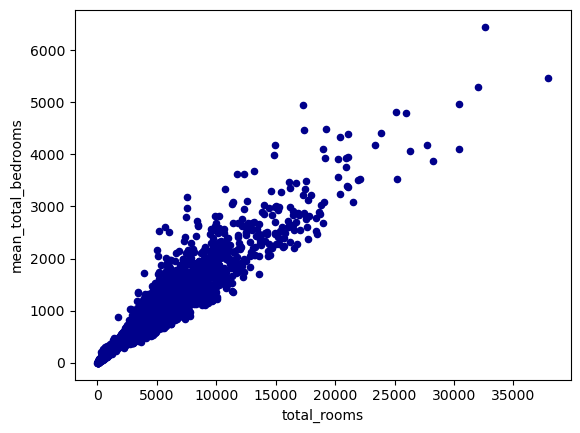

In [49]:
medias_dormitorios_por_habitacion.plot.scatter( x='total_rooms',y='mean_total_bedrooms',c='DarkBlue')

Estos datos tienen sentido. Cuantas mas habitaciones tenga un bloque de pisos mas media de dormitorios tiene que existir. Además los datos muestran que el numero de dormitorios nunca supera al numero de habitaciones 

Ahora voy a calcular el número medio de habitantes en un bloque por habitaciones que contenga

In [50]:
calculo_medias_poblacion_por_habitaciones  = calculo_medias_x_por_y ("population", "total_rooms", Data_housing_train)

In [51]:
calculo_medias_poblacion_por_habitaciones

,total_rooms,mean_population
2990,2.0,6.0
16309,8.0,13.0
8188,11.0,24.0
15369,12.0,18.0
15656,15.0,13.0
...,...,...
1116,30401.0,13251.0
8881,30405.0,12873.0
2969,32054.0,15507.0
12772,32627.0,28566.0


<AxesSubplot:xlabel='total_rooms', ylabel='mean_population'>

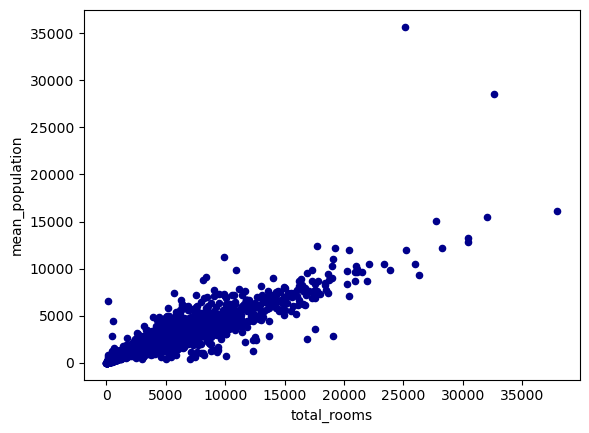

In [52]:
calculo_medias_poblacion_por_habitaciones.plot.scatter( x='total_rooms',y='mean_population',c='DarkBlue')

Estos datos tienen sentido, cuantas mas habitaciones hay en un bloque de edificios más personas viven en el. Y en general se cumple. También se cumple en general que hay más habitaciones que personas en un bloque de pisos. Además me parece curioso calcular el valor medio de cuantas personas viven por habitación en un bloque

In [53]:
s_total = 0

for i in calculo_medias_poblacion_por_habitaciones.sort_index().index:
    s = (calculo_medias_poblacion_por_habitaciones.iloc[: , 1].sort_index()[i]) / (calculo_medias_poblacion_por_habitaciones.iloc[: , 0].sort_index()[i])
    
    #For sencillo, solo necesito ordenar los datos
    
    s_total = s_total + s
    

print(s_total/5533)    



0.5830676881000687


Se aproxima a 0.5. Cada 2 habitaciones que tenga una casa, se esperará que haya una persona viviendo.

Y siendo exactos se espera que por cada habitacion haya 1,67 personas. Pero no es real porque las personas no se pueden separar.

Por último me gustaría saber si la gente vive más en el norte o en el sur en California de 1990. 

In [54]:
calculo_medias_poblacion_por_latitud= calculo_medias_x_por_y ("population", "latitude", Data_housing_train)

In [55]:
calculo_medias_poblacion_por_latitud

,latitude,mean_population
680,32.54,1187.000000
796,32.55,3530.666667
1161,32.56,2417.888889
994,32.57,1740.769231
735,32.58,1481.350000
...,...,...
10620,41.82,429.000000
16997,41.84,1244.000000
13341,41.86,1532.333333
16883,41.88,660.000000


<AxesSubplot:xlabel='latitude', ylabel='mean_population'>

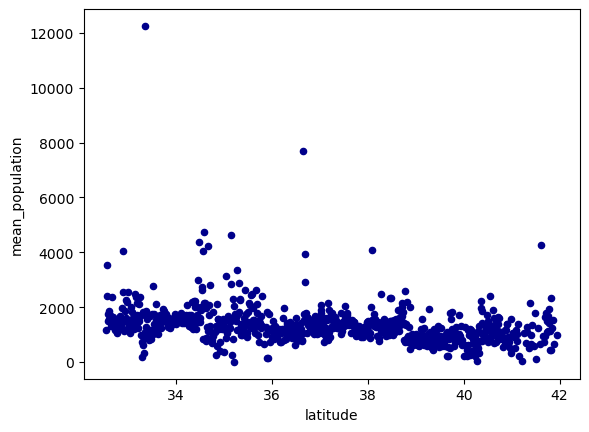

In [56]:
calculo_medias_poblacion_por_latitud.plot.scatter( x='latitude',y='mean_population',c='DarkBlue')


Se podría concluir de forma timida que en California parece que la gente vive más en el sur. Se debería mirar más detenidamente

**Laboratorio 3**

In [57]:
calculo_medias_poblacion_por_habitaciones.iloc[: , 1].sort_index()[0] / calculo_medias_poblacion_por_habitaciones.iloc[: , 0].sort_index()[0]

0.1808624376336422

In [58]:
calculo_medias_poblacion_por_habitaciones.sort_index().index

Int64Index([    0,     1,     6,    10,    13,    15,    17,    19,    24,
               25,
            ...
            16968, 16971, 16978, 16983, 16986, 16988, 16989, 16990, 16991,
            16993],
           dtype='int64', length=5533)

In [59]:
calculo_medias_poblacion_por_habitaciones.iloc[: , 1].sort_index()

0        1015.000000
1        1129.000000
6        1895.500000
10       1886.500000
13       1456.500000
            ...     
16988    1993.000000
16989     911.333333
16990    1530.000000
16991    1370.500000
16993    1152.000000
Name: mean_population, Length: 5533, dtype: float64

In [60]:
medias_dormitorios_por_habitacion.loc[medias_dormitorios_por_habitacion.total_rooms == 720]

,total_rooms,mean_total_bedrooms
3385,720.0,191.25


In [61]:


Data_housing_train.loc[Data_housing_train.total_rooms == 720]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3385,-117.88,33.74,29.0,720.0,174.0,1045.0,181.0,3.1964,151900.0
6930,-118.31,34.09,28.0,720.0,267.0,891.0,265.0,1.8977,100000.0
12367,-121.54,39.33,27.0,720.0,150.0,359.0,138.0,2.5313,61300.0
